In [2]:
import numpy as np
from scipy import interpolate, optimize
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.constants import pi, hbar, e, m_e, k

In [3]:
data = np.loadtxt('../../ion-data/N2-tot-cross.txt')
E = data[:, 0]
cross_tot = data[:, 1]*1.0E-20 # Data is in 10^-16 cm^2, convert to m^2

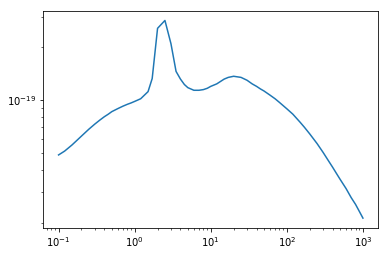

In [4]:
plt.loglog(E, cross_tot)

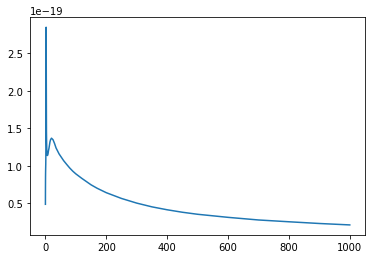

In [5]:
plt.plot(E, cross_tot)

In [6]:
v = np.sqrt(2*e*E/m_e)

tck_1 = interpolate.splrep(x=E, y=cross_tot, s=0)
cross_sp = lambda x: interpolate.splev(x, tck_1, der=0)

tck_2 = interpolate.splrep(E, v*cross_tot)
cross_sp_v = lambda x: interpolate.splev(x, tck_2, der=0)

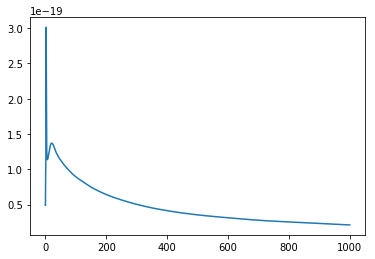

In [7]:
E_new = np.linspace(0.0, 1000, num=10000)
cross_new = cross_sp(E_new)
#print(E_new)
#print(cross_new)
#print(np.c_[E_new, cross_new/1.0E-20])
plt.plot(E_new, cross_new)

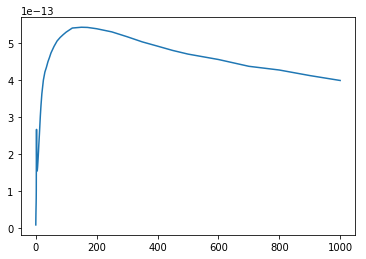

In [8]:
#plt.loglog(E, v*cross_tot)
plt.plot(E, v*cross_tot)
#plt.xlim(50, 400)

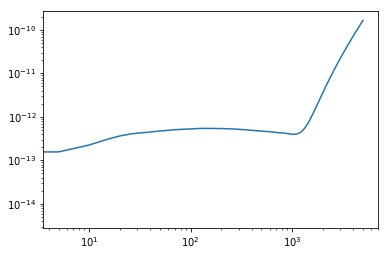

In [9]:
E_new = np.linspace(0, 5000, num=1000)
cross_new = cross_sp_v(E_new)
plt.loglog(E_new, cross_new)

In [10]:
# normal temperature and pressure (NTP)
P = 101325.0 # Pa
T = 293.15 # K

# System
time_step = 0.25E-15
N_2 = 2200
n_1 = P/(k*T)
CTV_max = 5.5E-13 # Approx

# Max number of collisions
N = 0.5*time_step*n_1*N_2*CTV_max
print(N)

3.7865087568191647


In [11]:
np.mean(v*cross_tot)

2.752782060381331e-13

In [12]:
len(E)

61

In [13]:
a = 7.98
b = -0.005845
c = 4.628
d = -0.0007864

f = lambda x: a*np.exp(b*x) + c*np.exp(d*x)

In [14]:
E_new = np.linspace(1100, 3000, 10000)
cross_new = f(E_new)*1.0E-20

In [15]:
cross_com = np.hstack((cross_tot, cross_new))
E_com = np.hstack((E, E_new))

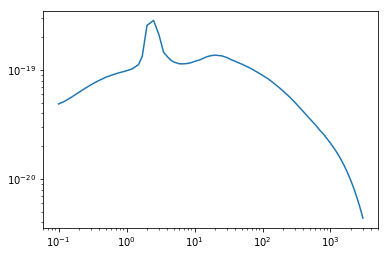

In [16]:
plt.loglog(E_com, cross_com)

In [17]:
v_com = np.sqrt(2*e*E_com/m_e)
print(np.mean(v_com*cross_com))

2.538764385560707e-13


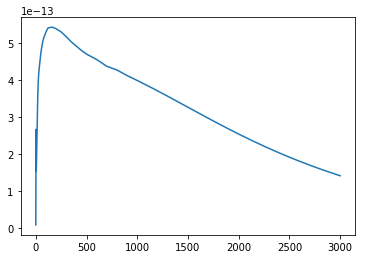

In [18]:
plt.plot(E_com, v_com*cross_com)

In [19]:
np.max(v_com*cross_com)

5.433415606647856e-13

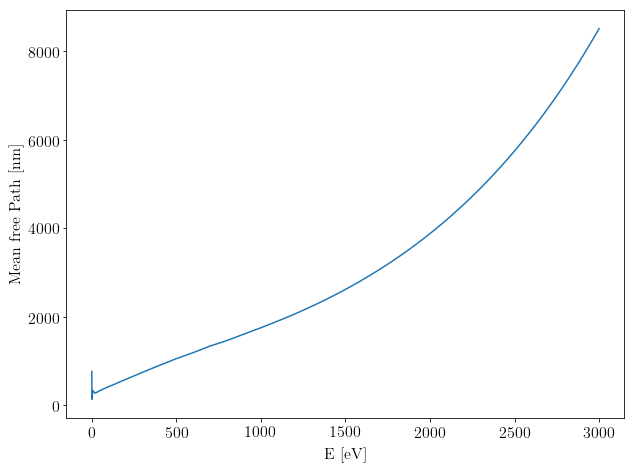

In [27]:
P = 101.3E3 #Pa
T = 273.15 # K
n = P/(k*T)

mean_path = 1.0/(n*cross_com)

plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=16)
plt.rcParams['figure.figsize'] = [10, 7.5]

plt.plot(E_com, mean_path/1.0E-9)
plt.xlabel('E [eV]')
plt.ylabel('Mean free Path [nm]')

plt.show()